In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [85]:
import numpy as np

# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

for iter in xrange(10000):

    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))

    # how much did we miss?
    l1_error = y - l1

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)

print "Output After Training:"
print l1

Output After Training:
[[ 0.00966449]
 [ 0.00786506]
 [ 0.99358898]
 [ 0.99211957]]


In [95]:
inner_num_features = 2
num_of_samples = 200
# input dataset
X = np.concatenate([np.random.randint(0,2,size=(num_of_samples,inner_num_features)),
                                      np.random.randint(0,20,size=(num_of_samples,inner_num_features))])
X[:,-1]=1

# output dataset            
y = np.concatenate([np.random.randint(0,1,size=(num_of_samples,1)),np.random.randint(1,2,size=(num_of_samples,1))])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((inner_num_features,2)) - 1
syn1 = 2*np.random.random((2,1)) - 1

for j in xrange(60000):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2
    

    l2_delta = l2_error*nonlin(l2,deriv=True)
    
    if (j% 10000) == 0:
        print "Error:" + str(np.mean(np.abs(l2_error)))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)


Error:0.525576242504
Error:0.334332013097
Error:0.334374236596
Error:0.33438778288
Error:0.334394430927
Error:0.334398373814


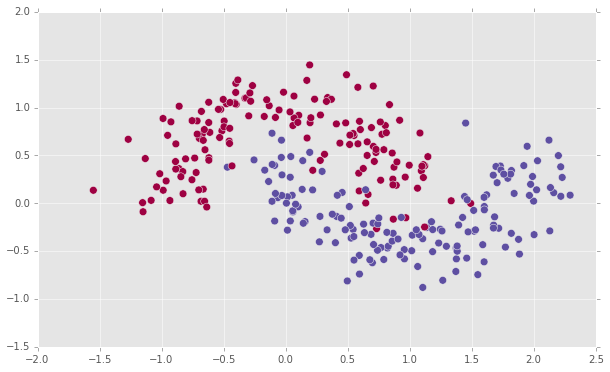

In [101]:
# Generate a dataset and plot it
from sklearn import datasets 
from sklearn import linear_model


X, y = datasets.make_moons(300, noise=0.20)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], s=60, c=y, cmap=plt.cm.Spectral ,)

In [106]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

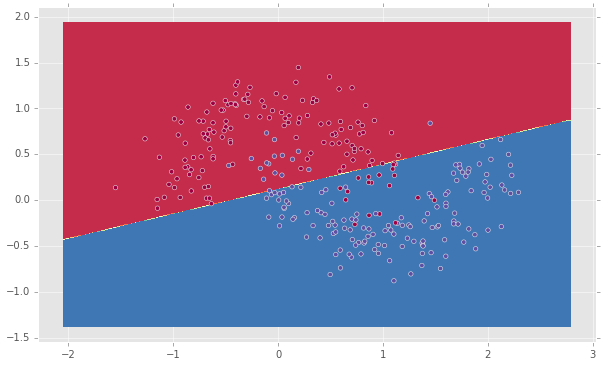

In [107]:

# Train the logistic rgeression classifier
clf = linear_model.LogisticRegressionCV()
clf.fit(X, y)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))


In [108]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
 
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength


In [162]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    print probs.shape
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return probs,1./num_examples * data_loss


In [161]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)


In [167]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
              print "Loss after iteration %i: %f" %(i, calculate_loss(model)[1])
        probs,loss = calculate_loss(model)
    return model,probs,loss

(300, 2)
Loss after iteration 0: 0.467785
(300, 2)


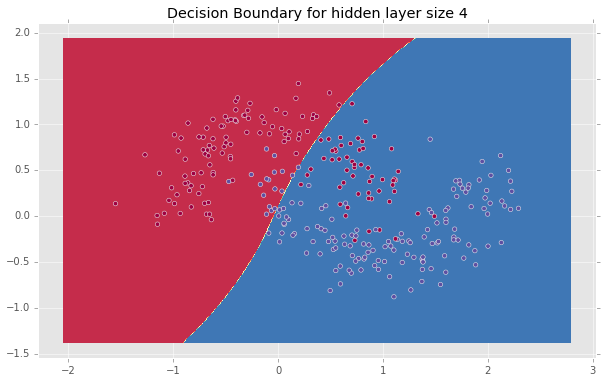

In [176]:
# Build a model with a 3-dimensional hidden layer
layers = 4
model,probs,loss = build_model(layers,1, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size "+str(layers))


In [178]:
corect_logprobs = -np.log(probs[range(num_examples), y])
data_loss = np.sum(corect_logprobs)
print data_loss
# Add regulatization term to loss (optional)
data_loss += reg_lambda/2 * (np.sum(np.square(model['W1'])) + np.sum(np.square(model['W2'])))
#return probs,1./num_examples * data_loss
data_loss

140.285271105


140.33557134379171